In [87]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

In [22]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2.

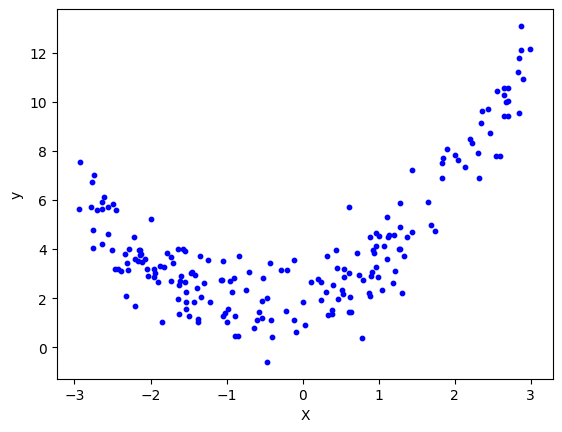

In [50]:
plt.scatter(X, y, s=10, c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Applying the simple Linear Regression.

In [35]:
# train-test-split the dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
# train simple linear regression. 
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

In [42]:
r2_score(y_test, y_pred)

0.2570042755788807

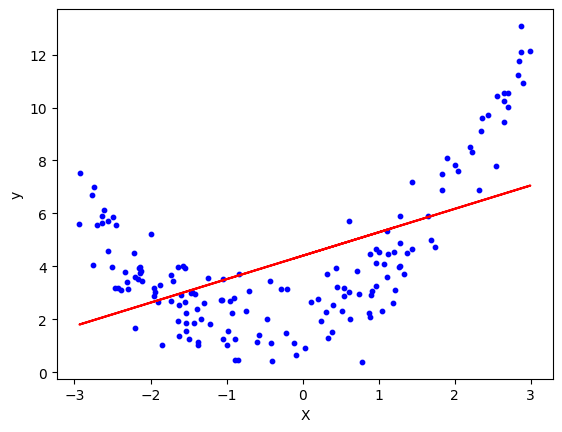

In [64]:
# plot the Linear Regression line. 
plt.scatter(X_train, y_train, s=10, c = 'blue')
plt.plot(X_train, lr.predict(X_train), c = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Applying the Polynomial Linear Regression.

In [71]:
# transform our input features into polynomial. 
poly = PolynomialFeatures(degree = 2)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.transform(X_test)

# get features in the form of [1, X, X^2] when the degree is two. 

In [72]:
print(X_test[0])
print(X_train_transformed[0])

[-2.78851405]
[ 1.         -0.11413677  0.0130272 ]


In [73]:
poly_lr = LinearRegression()
poly_lr.fit(X_train_transformed, y_train)

LinearRegression()

In [74]:
y_pred_ploy = poly_lr.predict(X_test_transformed)

In [75]:
r2_score(y_test, y_pred_ploy)

0.831649618937664

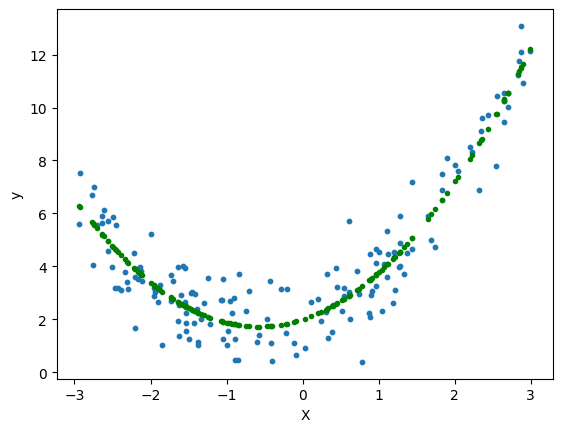

In [85]:
# plot the Linear Polynomial Regression line. 
plt.scatter(X_train, y_train, s=10)
plt.plot(X_train, poly_lr.predict(X_train_transformed), 'g.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [89]:
# complete function for the polynomial LR. 

def polynomial_regression(degree = 2):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

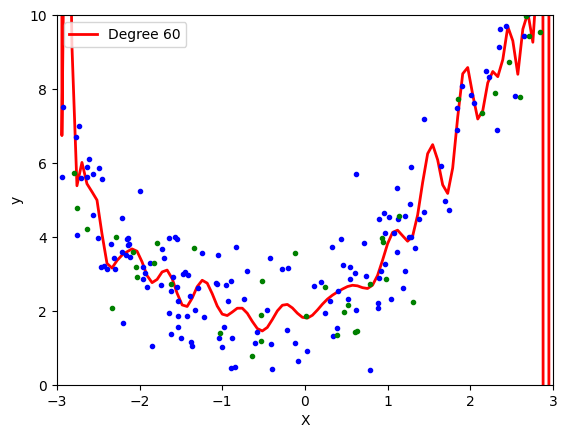

In [93]:
polynomial_regression(60)